In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_column',1000)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# UNDERSTANDING THE DATA

In [14]:
#reading the data file
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ML 2/House Grade.csv')
df_c = df.copy()
df.head()

,Id,Area(total),Trooms,Nbedrooms,Nbwashrooms,Twashrooms,roof,Roof(Area),Lawn(Area),Nfloors,API,ANB,Expected price,Grade
0,1,339,6,5,4,6,NO,0,76,2,79,6,3481,D
1,2,358,5,4,3,4,YES,71,96,3,72,4,3510,D
2,3,324,7,5,4,5,YES,101,117,5,64,3,3748,C
3,4,330,6,4,3,5,YES,101,82,2,59,2,3134,D
4,5,320,7,4,4,5,NO,0,75,3,40,1,3843,D


In [15]:
df.isnull().sum()

Id                0
Area(total)       0
Trooms            0
Nbedrooms         0
Nbwashrooms       0
Twashrooms        0
roof              0
Roof(Area)        0
Lawn(Area)        0
Nfloors           0
API               0
ANB               0
Expected price    0
Grade             0
dtype: int64

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Id              3000 non-null   int64 
 1   Area(total)     3000 non-null   int64 
 2   Trooms          3000 non-null   int64 
 3   Nbedrooms       3000 non-null   int64 
 4   Nbwashrooms     3000 non-null   int64 
 5   Twashrooms      3000 non-null   int64 
 6   roof            3000 non-null   object
 7   Roof(Area)      3000 non-null   int64 
 8   Lawn(Area)      3000 non-null   int64 
 9   Nfloors         3000 non-null   int64 
 10  API             3000 non-null   int64 
 11  ANB             3000 non-null   int64 
 12  Expected price  3000 non-null   int64 
 13  Grade           3000 non-null   object
dtypes: int64(12), object(2)
memory usage: 328.2+ KB


In [17]:
df.nunique()

Id                3000
Area(total)         71
Trooms               5
Nbedrooms            7
Nbwashrooms          8
Twashrooms           9
roof                 2
Roof(Area)          52
Lawn(Area)          51
Nfloors              7
API                 61
ANB                  6
Expected price    1647
Grade                5
dtype: int64

# DATA VISUALS

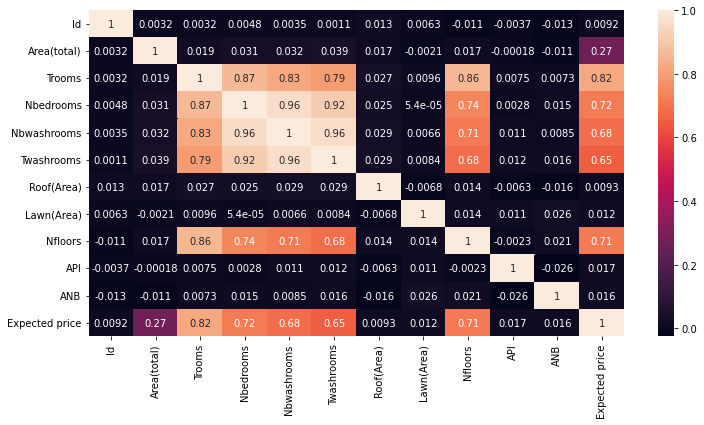

In [85]:
fig, ax = plt.subplots(figsize=(12,6))
sns.heatmap(df_c.corr(),annot=True)

<Figure size 720x576 with 0 Axes>

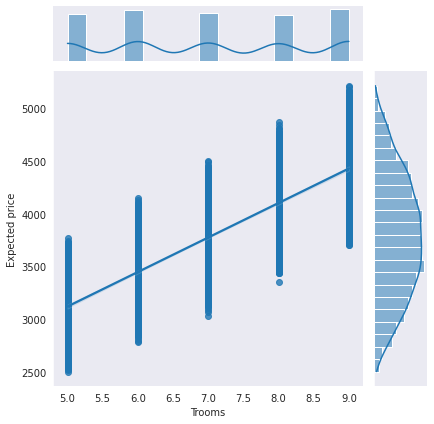

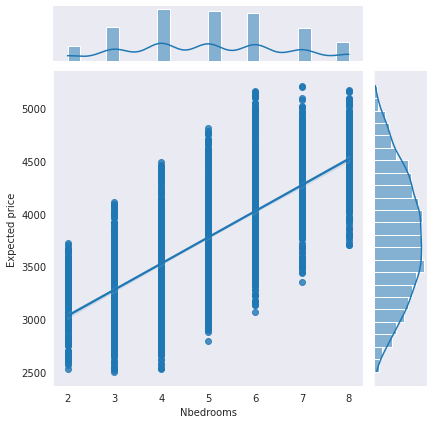

In [118]:
plt.figure(figsize=(10,8))
sns.jointplot(x=df["Trooms"], y=df["Expected price"], kind="reg")
sns.jointplot(x=df["Nbedrooms"], y=df["Expected price"], kind="reg")
plt.show()

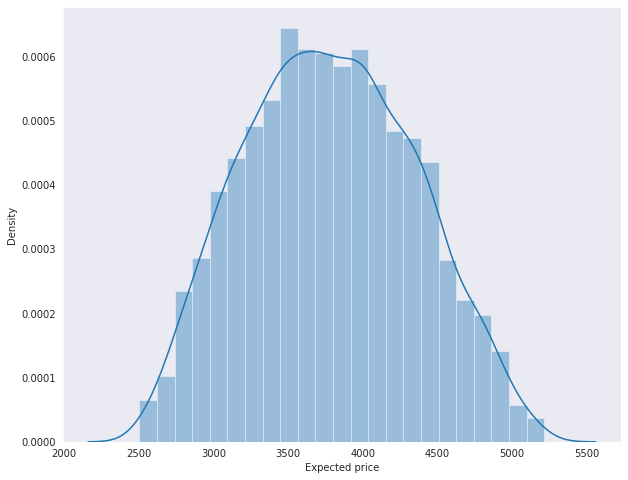

In [119]:
plt.figure(figsize=(10,8))
sns.distplot(df['Expected price'])
plt.show()

# ENCODING,NORMALISATION AND SPLITTING THE DATA

In [18]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
col = list(df.select_dtypes(include='object'))
for i in col:
  df[i] = le.fit_transform(df[i])
df.head()

,Id,Area(total),Trooms,Nbedrooms,Nbwashrooms,Twashrooms,roof,Roof(Area),Lawn(Area),Nfloors,API,ANB,Expected price,Grade
0,1,339,6,5,4,6,0,0,76,2,79,6,3481,3
1,2,358,5,4,3,4,1,71,96,3,72,4,3510,3
2,3,324,7,5,4,5,1,101,117,5,64,3,3748,2
3,4,330,6,4,3,5,1,101,82,2,59,2,3134,3
4,5,320,7,4,4,5,0,0,75,3,40,1,3843,3


In [19]:
from sklearn.preprocessing import MinMaxScaler
sca = MinMaxScaler()
df_scaled = pd.DataFrame(sca.fit_transform(df),columns=df.columns)
df_scaled.head()

,Id,Area(total),Trooms,Nbedrooms,Nbwashrooms,Twashrooms,roof,Roof(Area),Lawn(Area),Nfloors,API,ANB,Expected price,Grade
0,0.000000,0.700000,0.25,0.500000,0.428571,0.500,0.0,0.000000,0.12,0.166667,0.650000,1.0,0.360251,0.75
1,0.000333,0.971429,0.00,0.333333,0.285714,0.250,1.0,0.591667,0.52,0.333333,0.533333,0.6,0.370944,0.75
2,0.000667,0.485714,0.50,0.500000,0.428571,0.375,1.0,0.841667,0.94,0.666667,0.400000,0.4,0.458702,0.50
3,0.001000,0.571429,0.25,0.333333,0.285714,0.375,1.0,0.841667,0.24,0.166667,0.316667,0.2,0.232301,0.75
4,0.001334,0.428571,0.50,0.333333,0.428571,0.375,0.0,0.000000,0.10,0.333333,0.000000,0.0,0.493732,0.75


In [20]:
df_scaled.drop(columns=['Id','Grade'],inplace=True)
x = df_scaled
y = df['Grade']
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

# CLASSIFICATION ANALYSIS USING VARIOUS MODELS

*NAIVE BAYES*

In [28]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,f1_score,precision_score
from sklearn.model_selection import StratifiedKFold,cross_val_score
#-------------------------------------------
gnb = GaussianNB()
model1 = gnb.fit(x_train,y_train)
y_pred1 = model1.predict(x_test)
r21 = model1.score(x_train,y_train)
as1 = accuracy_score(y_test,y_pred1)
f11 = f1_score(y_test,y_pred1,average='weighted')
p1 = precision_score(y_test,y_pred1,average='weighted')
#-------------------------------------------
skf = StratifiedKFold(n_splits=5)
cv1 = cross_val_score(model1,x,y,cv=skf,scoring='f1_weighted').mean()
a1 = cross_val_score(model1,x,y,cv=skf,scoring='f1_weighted')

*DECESION TREE CLASSIFIER*

In [29]:
from sklearn.tree import DecisionTreeClassifier
#-------------------------------------------
dtc = DecisionTreeClassifier()
model2 = dtc.fit(x_train,y_train)
y_pred2 = model2.predict(x_test)
r22 = model2.score(x_train,y_train)
as2 = accuracy_score(y_test,y_pred2)
f12 = f1_score(y_test,y_pred2,average='weighted')
p2 = precision_score(y_test,y_pred2,average='weighted')
#-----------------------------------------------
cv2 = cross_val_score(model2,x,y,cv=skf,scoring='f1_weighted').mean()
a2 = cross_val_score(model2,x,y,cv=skf,scoring='f1_weighted')

*RANDOM FOREST CLASSIFIER*

In [30]:
from sklearn.ensemble import RandomForestClassifier
#-------------------------------------------
rfc = RandomForestClassifier(max_depth=7,n_estimators=10,oob_score=True)
model3 = rfc.fit(x_train,y_train)
y_pred3 = model3.predict(x_test)
r23 = model3.score(x_train,y_train)
as3 = accuracy_score(y_test,y_pred3)
f13 = f1_score(y_test,y_pred3,average='weighted')
p3 = precision_score(y_test,y_pred3,average='weighted')
#-----------------------------------------------
cv3 = cross_val_score(model3,x,y,cv=skf,scoring='f1_weighted').mean()
a3 = cross_val_score(model3,x,y,cv=skf,scoring='f1_weighted')

KNN CLASSIFIER

In [31]:
from sklearn.neighbors import KNeighborsClassifier
#-------------------------------------------
knc = KNeighborsClassifier(n_neighbors=5)
model4 = rfc.fit(x_train,y_train)
y_pred4 = model4.predict(x_test)
r24 = model4.score(x_train,y_train)
as4 = accuracy_score(y_test,y_pred4)
f14 = f1_score(y_test,y_pred4,average='weighted')
p4 = precision_score(y_test,y_pred4,average='weighted')
#-----------------------------------------------
cv4 = cross_val_score(model3,x,y,cv=skf,scoring='f1_weighted').mean()
a4 = cross_val_score(model3,x,y,cv=skf,scoring='f1_weighted')

XGBOOST extreme Gradient boosting 

In [39]:
import xgboost as xgb
#-------------------------------------------
xgbc = xgb.XGBClassifier(max_depth=6,n_estimators=100)
model5 = rfc.fit(x_train,y_train)
y_pred5 = model5.predict(x_test)
r25 = model5.score(x_train,y_train)
as5 = accuracy_score(y_test,y_pred5)
f15 = f1_score(y_test,y_pred5,average='weighted')
p5 = precision_score(y_test,y_pred5,average='weighted')
#-----------------------------------------------
cv5 = cross_val_score(model5,x,y,cv=skf,scoring='f1_weighted').mean()
a5 = cross_val_score(model5,x,y,cv=skf,scoring='f1_weighted')
#-----------------------------------------------

In [44]:
dict1 = {'MODELS':['GNB','DTC','RFC','KNC','XGBC'],'TRAINING PERFORMANCE':[r21,r22,r23,r24,r25],'ACCURACY SCORE':[as1,as2,as3,as4,as5],'F1 SCORE':[f11,f12,f13,f14,f15],'PRECISION SCORE':[p1,p2,p3,p4,p5],'F1_CV_score':[cv1,cv2,cv3,cv4,cv5],'arrays':[a1,a2,a3,a4,a5]}
df1 = pd.DataFrame(dict1)
df1

,MODELS,TRAINING PERFORMANCE,ACCURACY SCORE,F1 SCORE,PRECISION SCORE,F1_CV_score,arrays
0,GNB,0.800000,0.821111,0.825090,0.834403,0.803623,"[0.8038050725542633, 0.8226952123524109, 0.793..."
1,DTC,1.000000,0.858889,0.858360,0.860794,0.836155,"[0.8150755262177223, 0.8512555832670737, 0.835..."
2,RFC,0.915238,0.872222,0.868137,0.876698,0.857828,"[0.8399640380050561, 0.8616842688917158, 0.855..."
3,KNC,0.917619,0.876667,0.871122,0.880199,0.851324,"[0.8589668707583172, 0.8557244217332542, 0.840..."
4,XGBC,0.914762,0.876667,0.871101,0.880552,0.851985,"[0.8592868463871867, 0.8701950498099927, 0.851..."


In [120]:
dict5 = {'MODELS':['GNB','DTC','RFC','KNC','XGBC'],'F1 SCORE':[f11,f12,f13,f14,f15],'PRECISION SCORE':[p1,p2,p3,p4,p5]}
df5 = pd.DataFrame(dict5)
df5

,MODELS,F1 SCORE,PRECISION SCORE
0,GNB,0.825090,0.834403
1,DTC,0.858360,0.860794
2,RFC,0.868137,0.876698
3,KNC,0.871122,0.880199
4,XGBC,0.871101,0.880552


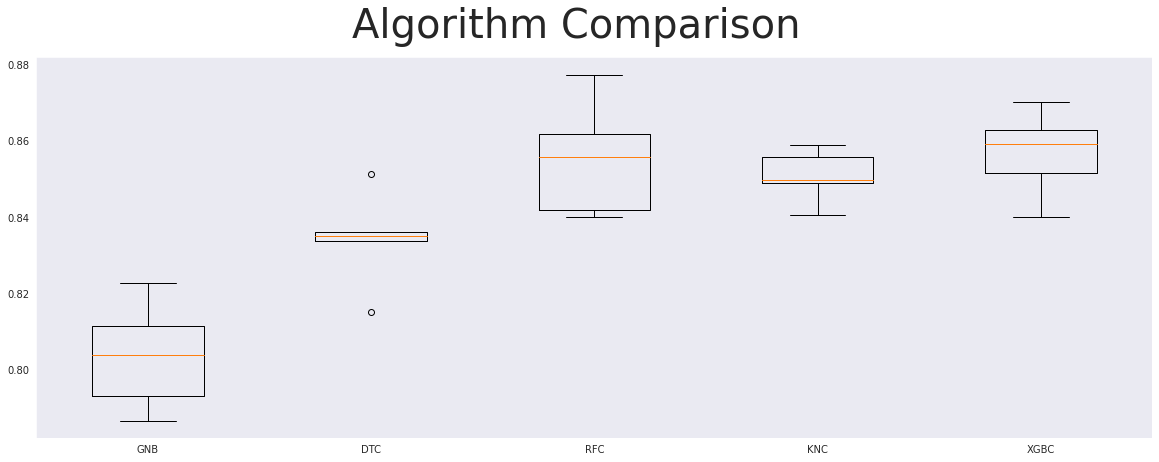

In [105]:
#model performance using box plot for comparision
fig,ax = plt.subplots(figsize = (20,7))
plt.boxplot(df1["arrays"],labels=df1['MODELS'])
fig.suptitle('Algorithm Comparison',size=40)
plt.show()

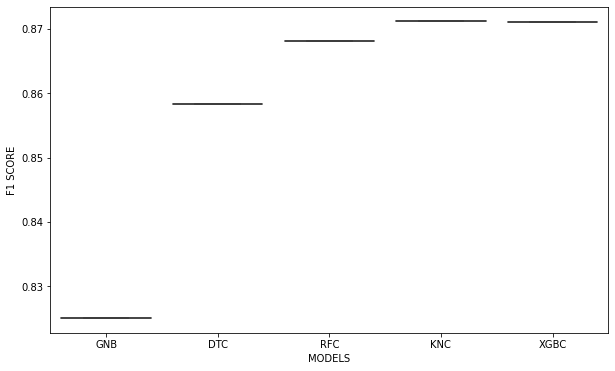

In [60]:
#plots for algo comparision
fig,ax = plt.subplots(figsize = (10,6))
sns.boxplot(x=df1['MODELS'],y=df1['F1 SCORE'])

# HYPERPARAMETER TUNING TO GET THE IDEAL MODEL AND TO PREDICT THE TARGET COLUMN

In [64]:
from sklearn.model_selection import GridSearchCV
knc1 = KNeighborsClassifier()
knc1.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [66]:
params = {'n_neighbors':[2,3,4,5,6,7,8,9,10,11,12,13],'algorithm': ['auto'],'leaf_size': [5,10,15,20,25,30],'weights': ['uniform','distance'],'p': [1,2],'metric': ['minkowski','manhattan']}
knc_gs = GridSearchCV(estimator=knc1,param_grid=params,scoring='f1_weighted')
knc_gs.fit(x_train,y_train)
print(knc_gs.best_params_)
print(knc_gs.best_score_)

{'algorithm': 'auto', 'leaf_size': 5, 'metric': 'minkowski', 'n_neighbors': 9, 'p': 1, 'weights': 'distance'}
0.8889884717139085


In [108]:
#BUILDING THE BEST MODEL FOR PREDICTING THE TARGET COLUMN
knc_ideal = KNeighborsClassifier(algorithm='auto', leaf_size=5,metric='minkowski',n_neighbors = 9, p=1, weights='distance')
ideal_model = knc_ideal.fit(x_train,y_train)
test_pred = knc_ideal.predict(x_test)
train_pred = knc_ideal.predict(x_train)
fi = f1_score(y_test,test_pred,average='weighted')

In [69]:
#model comparision efore and after hyperparameter tuning
dict2 = {'MODELS':['KNC','KNC-TUNED'],'F1 SCORE':[f14,fi]}
df2 = pd.DataFrame(dict2)
df2

,MODELS,F1 SCORE
0,KNC,0.871122
1,KNC-TUNED,0.909779


Text(87.0, 0.5, 'Predicted +ve/-ve')

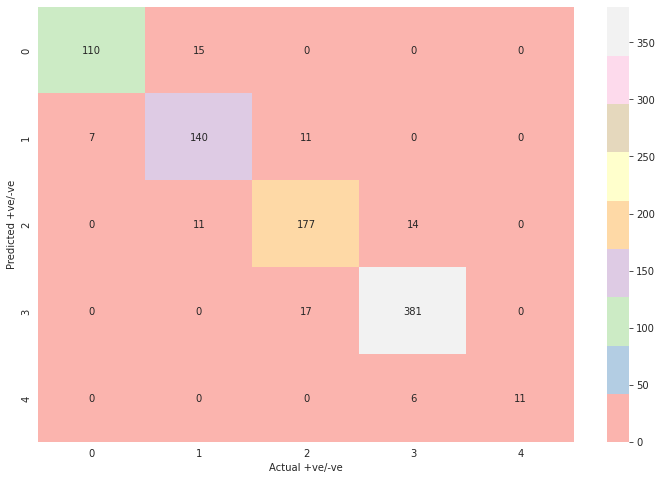

In [134]:
from sklearn.metrics import confusion_matrix

matrix = confusion_matrix(y_test,test_pred)
fig, ax = plt.subplots(figsize=(12,8))
sns.heatmap(matrix,annot=True,cmap='Pastel1')
plt.xlabel('Actual +ve/-ve')
plt.ylabel('Predicted +ve/-ve')

In [76]:
#feature importance 
df3 = pd.DataFrame({'column_name':x.columns,'column_importance':model3.feature_importances_})
df3.sort_values(by='column_importance',ascending=False)

,column_name,column_importance
1,Trooms,0.187902
3,Nbwashrooms,0.182102
2,Nbedrooms,0.161995
11,Expected price,0.115915
8,Nfloors,0.102166
4,Twashrooms,0.075610
0,Area(total),0.058524
9,API,0.035269
6,Roof(Area),0.029902
5,roof,0.025243


In [87]:
#final dataframe with predicted values
one = pd.DataFrame(data=train_pred,index=y_train.index)
two = pd.DataFrame(data=test_pred,index=y_test.index)
three = pd.concat([one,two])
three.sort_index(ascending=True)
three1 = le.inverse_transform(three) #inverse transform on encoder labels
three1

array(['A', 'D', 'B', ..., 'C', 'D', 'D'], dtype=object)

In [93]:
df_c['Predicted_Grade'] = pd.DataFrame(three1)
df_c.head()

,Id,Area(total),Trooms,Nbedrooms,Nbwashrooms,Twashrooms,roof,Roof(Area),Lawn(Area),Nfloors,API,ANB,Expected price,Grade,Predicted_Grade
0,1,339,6,5,4,6,NO,0,76,2,79,6,3481,D,A
1,2,358,5,4,3,4,YES,71,96,3,72,4,3510,D,D
2,3,324,7,5,4,5,YES,101,117,5,64,3,3748,C,B
3,4,330,6,4,3,5,YES,101,82,2,59,2,3134,D,E
4,5,320,7,4,4,5,NO,0,75,3,40,1,3843,D,C


In [94]:
df_c.to_csv('final_house_grade.csv')

# **BUSINESS UNDERSTANDING**

1. Successful real estate agents use technology platforms to expand their marketing reach and knowledge base and gather relevant data.
2. Advising sellers on how they can make their homes more attractive to buyers and get them into better conditions indirectly putting them into better grades.
3. Comparing properties to determine fair and competitive market prices.
4. Many real estate firms have long made decisions based on a combination of intuition and traditional, retrospective data. 
5. Data Analytics make it possible to paint more vivid pictures of a location’s future risks and opportunities.
6. A successful data-driven approach can yield powerful insights. For ex:
the data given to us is a small to medium database combining traditional and non traditional data predicted house grades with an accuracy that exceeds 90%.

In [ ]:
!pip install autoviz

In [9]:
from autoviz.AutoViz_Class import AutoViz_Class as avc
autoviz = avc().AutoViz('/content/drive/MyDrive/Colab Notebooks/ML 2/House Grade.csv',verbose=1,lowess=True)

Shape of your Data Set loaded: (3000, 14)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
Data cleaning improvement suggestions. Complete them before proceeding to ML modeling.


,Nuniques,dtype,Nulls,Nullpercent,NuniquePercent,Value counts Min,Data cleaning improvement suggestions
Id,3000,int64,0,0.000000,100.000000,0,possible ID column: drop
Expected price,1647,int64,0,0.000000,54.900000,0,
Area(total),71,int64,0,0.000000,2.366667,0,
API,61,int64,0,0.000000,2.033333,0,
Roof(Area),52,int64,0,0.000000,1.733333,0,
Lawn(Area),51,int64,0,0.000000,1.700000,0,
Twashrooms,9,int64,0,0.000000,0.300000,0,
Nbwashrooms,8,int64,0,0.000000,0.266667,0,
Nbedrooms,7,int64,0,0.000000,0.233333,0,
Nfloors,7,int64,0,0.000000,0.233333,0,


    14 Predictors classified...
        1 variables removed since they were ID or low-information variables
        List of variables removed: ['Id']
Using Lowess Smoothing. This might take a few minutes for large data sets...
Number of All Scatter Plots = 66
All Plots done
Time to run AutoViz = 12 seconds 

 ###################### AUTO VISUALIZATION Completed ########################
